## Part Time Data Science 07 class: Phase 3 Project
### Project by: Nicholas Kirui
### Date of Submission: 01 September 2024

## Import libraries


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#  Import dataset


In [3]:
data = './Data/bigml.csv'

df = pd.read_csv(data)

# Exploratory data analysis

Explore the data to gain insights about the data. 

In [4]:
# preview the dataset
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# view dimensions of dataset
df.shape

(3333, 21)

Dataset has 21 variables and 3333 instances

### Identify the columns in the dataset

In [6]:
# review the column names
col_names = df.columns

col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Types of variables
In this section, I segregate the dataset into categorical and numerical variables. 
- There are a mixture of categorical and numerical variables in the dataset. 
- Categorical variables have data type object
- Numerical variables have data type float64

#### First of all, I will find categorical variables

In [8]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


In [9]:
# view the categorical variables

df[categorical].head()

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


### Summary of categorical variables

- There are 4 categorical variables. These are given by:
        -`state`, `phone number`, `international plan`,  and  `voice mail plan`


- There are two binary categorical variables:
        - `international plan`,  and  `voice mail plan`


## Explore problems within categorical variables

### Missing values in categorical variables

In [10]:
# check missing values in categorical variables

df[categorical].isnull().sum()

state                 0
phone number          0
international plan    0
voice mail plan       0
dtype: int64

There are no missing values in categorical variables

### Frequency counts of categorical variables

check the frequency counts of categorical variables.

In [11]:
# view frequency of categorical variables - state

print(df['state'].value_counts())

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
WA     66
CO     66
NV     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64


In [12]:
# view frequency of categorical variables: phone number

print(df['phone number'].value_counts())

354-5689    1
409-1856    1
370-3021    1
373-4483    1
403-9167    1
           ..
338-6981    1
403-1128    1
354-2434    1
414-7090    1
337-1225    1
Name: phone number, Length: 3333, dtype: int64


In [13]:
# view frequency of categorical variables: international plan

print(df['international plan'].value_counts())

no     3010
yes     323
Name: international plan, dtype: int64


In [14]:
# view frequency of categorical variables: voice mail plan

print(df['voice mail plan'].value_counts())

no     2411
yes     922
Name: voice mail plan, dtype: int64


### View the frequency distribution of categorical variables

In [15]:
# view frequency distribution of categorical variables: state

print(df['state'].value_counts()/np.float64(len(df)))

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OH    0.023402
OR    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
VT    0.021902
MI    0.021902
ID    0.021902
UT    0.021602
TX    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
MT    0.020402
NC    0.020402
NJ    0.020402
WA    0.019802
CO    0.019802
NV    0.019802
RI    0.019502
MS    0.019502
MA    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
ME    0.018602
NM    0.018602
ND    0.018602
OK    0.018302
DE    0.018302
NE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
DC    0.016202
GA    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64


In [16]:
# view frequency distribution of categorical variables: phone number

print(df['phone number'].value_counts()/np.float64(len(df)))

354-5689    0.0003
409-1856    0.0003
370-3021    0.0003
373-4483    0.0003
403-9167    0.0003
             ...  
338-6981    0.0003
403-1128    0.0003
354-2434    0.0003
414-7090    0.0003
337-1225    0.0003
Name: phone number, Length: 3333, dtype: float64


In [17]:
# view frequency distribution of categorical variables: international plan

print(df['international plan'].value_counts()/np.float64(len(df)))

no     0.90309
yes    0.09691
Name: international plan, dtype: float64


In [18]:
# view frequency distribution of categorical variables: voice mail plan

print(df['voice mail plan'].value_counts()/np.float64(len(df)))

no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64


### Number of labels: cardinality

The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, check for high cardinality.

In [19]:
# check for cardinality in categorical variables

for var in categorical:
        print(var, ' contains ', len(df[var].unique()), ' labels')

state  contains  51  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels


- phone number has the same number of labels as there are instances

### Explore Categorical Variables

Now, explore the categorical variables one by one. 

In [20]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


### Explore the `state` variable

In [21]:
# print number of labels in state variable
print('state contains', len(df["state"].unique()), 'labels')

state contains 51 labels


In [22]:
# check labels in state variable
df.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [23]:
# check frequency distribution of values in state variable

df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
WA     66
CO     66
NV     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [24]:
# let's do One Hot Encoding of state variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['state'], drop_first=True, dummy_na=True,dtype='int').head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['state'], drop_first=True, dummy_na=True).sum(axis=0)

AL      80
AR      55
AZ      64
CA      34
CO      66
CT      74
DC      54
DE      61
FL      63
GA      54
HI      53
IA      44
ID      73
IL      58
IN      71
KS      70
KY      59
LA      51
MA      65
MD      70
ME      62
MI      73
MN      84
MO      63
MS      65
MT      68
NC      68
ND      62
NE      61
NH      56
NJ      68
NM      62
NV      66
NY      83
OH      78
OK      61
OR      78
PA      45
RI      65
SC      60
SD      60
TN      53
TX      72
UT      72
VA      77
VT      73
WA      66
WI      78
WV     106
WY      77
NaN      0
dtype: int64

### Explore `phone number` variable

In [26]:
# print number of labels in phone number variable
print('phone number contains', len(df["phone number"].unique()), 'labels')

phone number contains 3333 labels


In [27]:
# check labels in phone number variable
df["phone number"].unique()

array(['382-4657', '371-7191', '358-1921', ..., '328-8230', '364-6381',
       '400-4344'], dtype=object)

In [28]:
# check frequency distribution of values in phone number variable

df["phone number"].value_counts()

354-5689    1
409-1856    1
370-3021    1
373-4483    1
403-9167    1
           ..
338-6981    1
403-1128    1
354-2434    1
414-7090    1
337-1225    1
Name: phone number, Length: 3333, dtype: int64

### Explore `intenational plan` variable

In [29]:
# print number of labels in international plan variable
print('international plan contains', len(df["international plan"].unique()), 'labels')

international plan contains 2 labels


In [30]:
# check labels in international plan variable
df["international plan"].unique()

array(['no', 'yes'], dtype=object)

In [31]:
# check frequency distribution of values in international plan variable

df["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [32]:
# let's do One Hot Encoding of international plan variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['international plan'], drop_first=True, dummy_na=True,dtype='int').head()

,yes,NaN
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0


In [33]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['international plan'], drop_first=True, dummy_na=True).sum(axis=0)

yes    323
NaN      0
dtype: int64

### Explore `voice mail plan` variable

In [34]:
# print number of labels in voice mail plan variable
print('voice mail plan contains', len(df["voice mail plan"].unique()), 'labels')

voice mail plan contains 2 labels


In [35]:
# check labels in voice mail plan variable
df["voice mail plan"].unique()

array(['yes', 'no'], dtype=object)

In [36]:
# check frequency distribution of values in voice mail plan variable

df["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [37]:
# let's do One Hot Encoding of voice mail plan variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['voice mail plan'], drop_first=True, dummy_na=True,dtype='int').head()

,yes,NaN
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [38]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['voice mail plan'], drop_first=True, dummy_na=True).sum(axis=0)

yes    922
NaN      0
dtype: int64

## Explore Numerical Variables

In [39]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [40]:
# view the numerical variables
df[numerical].head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Summary of numerical variables

- There are 17 numerical variables. 

- These are given by `account length`, `area code`, `number vmail messages`, `total day minutes`, `total day calls`, `total day charge`, `total eve minutes`,
                    `total eve calls`, `total eve charge`, `total night minutes`, `total night calls`, `total night charge`, `total intl minutes',	'total intl calls`, 
                    `total intl charge`, `customer service calls` and `churn`.

### Explore problems within numerical variables

Now, I will explore the numerical variables.

### Missing values in numerical variables

In [41]:
# check type of variables
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

In [42]:
# check missing values in numerical variables

df[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

All the numerical variables have no missing values

In [43]:
# view summary statistics in numerical variables
df[numerical].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [44]:
# view summary statistics in numerical variables. round off to nearest whole number
print(round(df[numerical].describe()),2)

       account length  area code  number vmail messages  total day minutes  \
count          3333.0     3333.0                 3333.0             3333.0   
mean            101.0      437.0                    8.0              180.0   
std              40.0       42.0                   14.0               54.0   
min               1.0      408.0                    0.0                0.0   
25%              74.0      408.0                    0.0              144.0   
50%             101.0      415.0                    0.0              179.0   
75%             127.0      510.0                   20.0              216.0   
max             243.0      510.0                   51.0              351.0   

       total day calls  total day charge  total eve minutes  total eve calls  \
count           3333.0            3333.0             3333.0           3333.0   
mean             100.0              31.0              201.0            100.0   
std               20.0               9.0               51

Text(0, 0.5, 'number vmail messages')

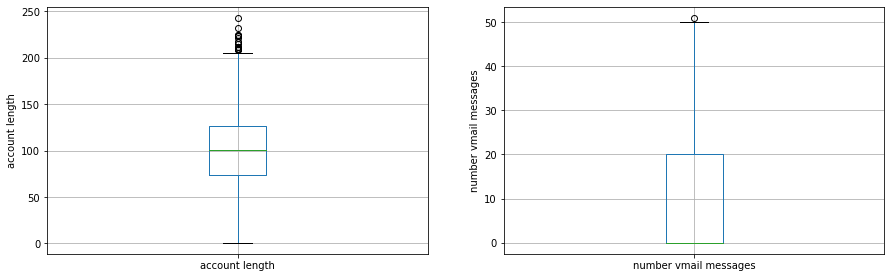

In [45]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='account length')
fig.set_title('')
fig.set_ylabel('account length')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='number vmail messages')
fig.set_title('')
fig.set_ylabel('number vmail messages')

Text(0, 0.5, 'total day calls')

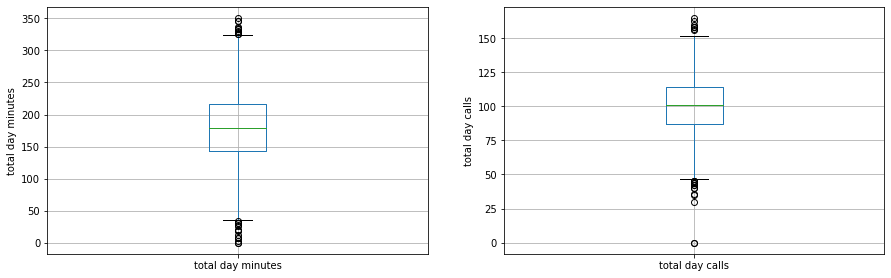

In [46]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 3)
fig = df.boxplot(column='total day minutes')
fig.set_title('')
fig.set_ylabel('total day minutes')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='total day calls')
fig.set_title('')
fig.set_ylabel('total day calls')

Text(0, 0.5, 'total eve minutes')

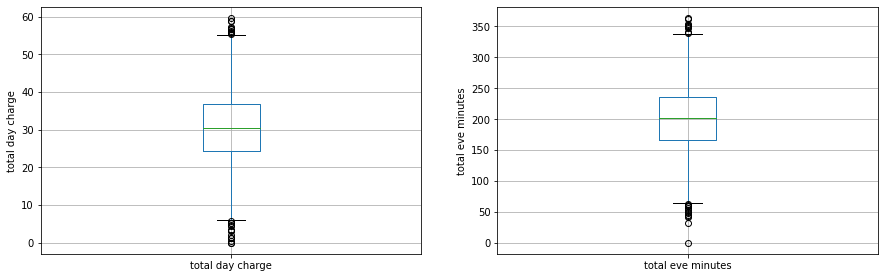

In [47]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 3)
fig = df.boxplot(column='total day charge')
fig.set_title('')
fig.set_ylabel('total day charge')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='total eve minutes')
fig.set_title('')
fig.set_ylabel('total eve minutes')

Text(0, 0.5, 'total eve charge')

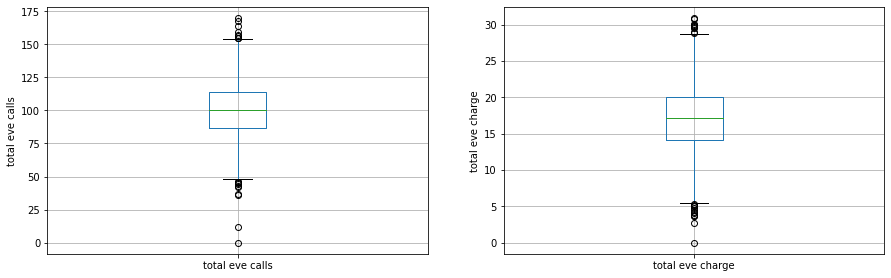

In [48]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 3)
fig = df.boxplot(column='total eve calls')
fig.set_title('')
fig.set_ylabel('total eve calls')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='total eve charge')
fig.set_title('')
fig.set_ylabel('total eve charge')

Text(0, 0.5, 'total night calls')

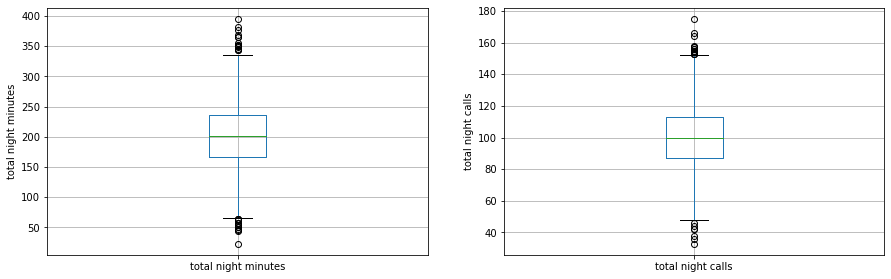

In [49]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='total night minutes')
fig.set_title('')
fig.set_ylabel('total night minutes')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='total night calls')
fig.set_title('')
fig.set_ylabel('total night calls')

Text(0, 0.5, 'total night charge')

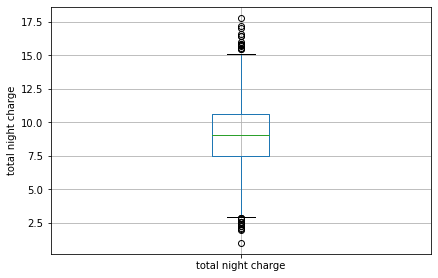

In [50]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 3)
fig = df.boxplot(column='total night charge')
fig.set_title('')
fig.set_ylabel('total night charge')


Text(0, 0.5, 'total night calls')

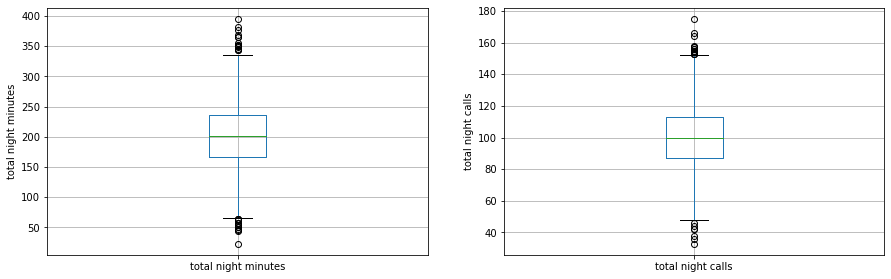

In [51]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='total night minutes')
fig.set_title('')
fig.set_ylabel('total night minutes')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='total night calls')
fig.set_title('')
fig.set_ylabel('total night calls')

Text(0, 0.5, 'total night charge')

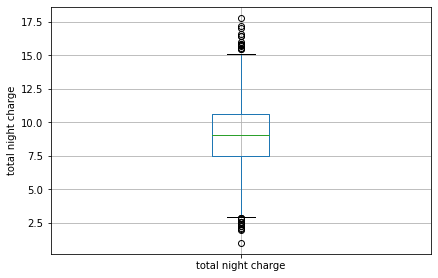

In [52]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='total night charge')
fig.set_title('')
fig.set_ylabel('total night charge')

Text(0, 0.5, 'customer service calls')

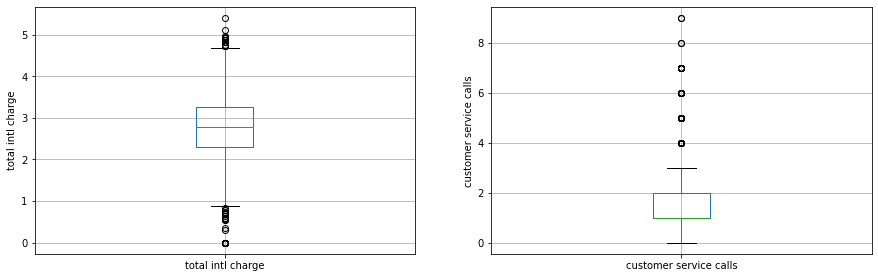

In [53]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 3)
fig = df.boxplot(column='total intl charge')
fig.set_title('')
fig.set_ylabel('total intl charge')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='customer service calls')
fig.set_title('')
fig.set_ylabel('customer service calls')

The above boxplots confirm that there are lot of outliers in these variables.

### Check the distribution of variables


Plot the histograms to check distributions to find out if they are normal or skewed. If the distributions are skewed, find IQR (Interquantile range)

Text(0, 0.5, 'churn')

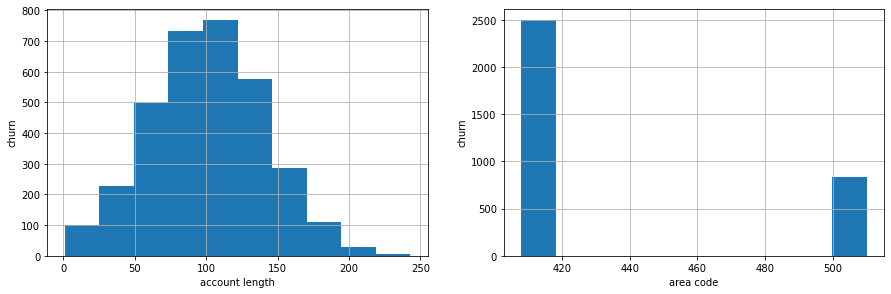

In [54]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df["account length"].hist(bins=10)
fig.set_xlabel('account length')
fig.set_ylabel('churn')


plt.subplot(2, 2, 2)
fig = df["area code"].hist(bins=10)
fig.set_xlabel('area code')
fig.set_ylabel('churn')

Text(0, 0.5, 'churn')

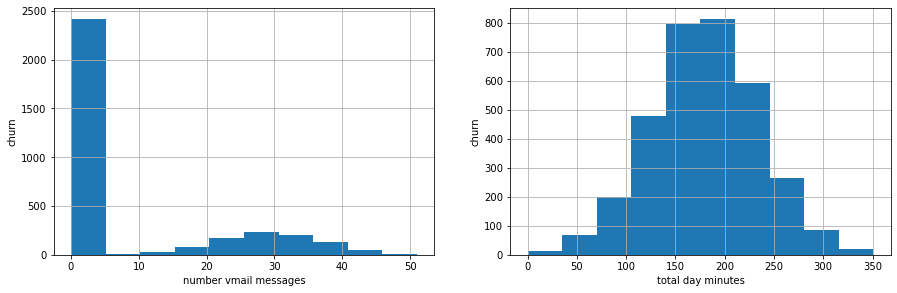

In [55]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df["number vmail messages"].hist(bins=10)
fig.set_xlabel('number vmail messages')
fig.set_ylabel('churn')

plt.subplot(2, 2, 2)
fig = df["total day minutes"].hist(bins=10)
fig.set_xlabel('total day minutes')
fig.set_ylabel('churn')

Text(0, 0.5, 'churn')

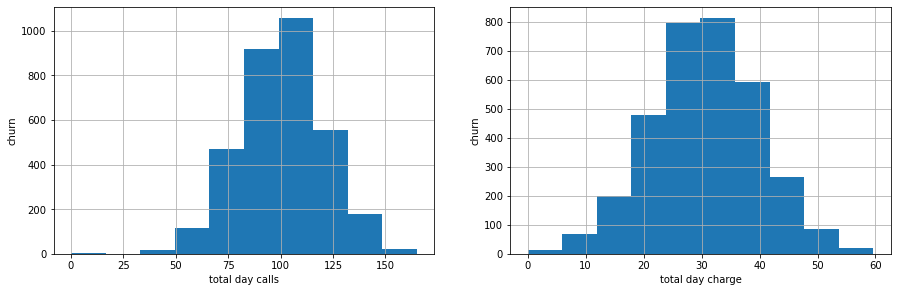

In [56]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df["total day calls"].hist(bins=10)
fig.set_xlabel('total day calls')
fig.set_ylabel('churn')

plt.subplot(2, 2, 2)
fig = df["total day charge"].hist(bins=10)
fig.set_xlabel('total day charge')
fig.set_ylabel('churn')

Text(0, 0.5, 'churn')

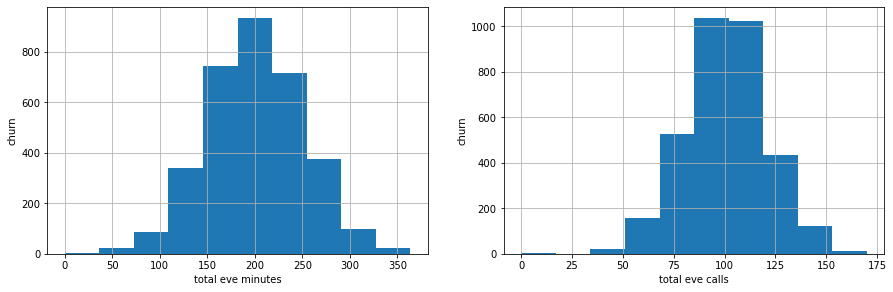

In [57]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df["total eve minutes"].hist(bins=10)
fig.set_xlabel('total eve minutes')
fig.set_ylabel('churn')

plt.subplot(2, 2, 2)
fig = df["total eve calls"].hist(bins=10)
fig.set_xlabel('total eve calls')
fig.set_ylabel('churn')

Text(0, 0.5, 'churn')

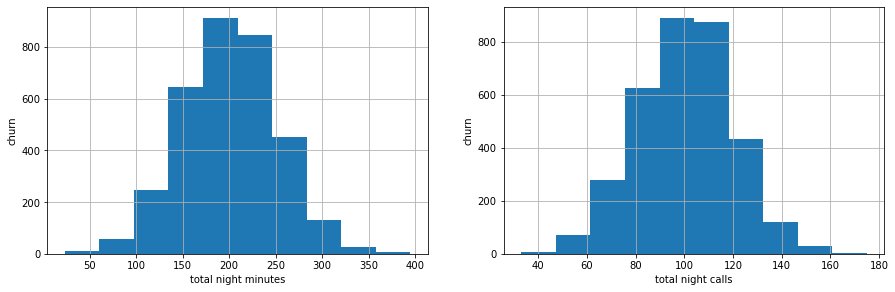

In [58]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df["total night minutes"].hist(bins=10)
fig.set_xlabel('total night minutes')
fig.set_ylabel('churn')

plt.subplot(2, 2, 2)
fig = df["total night calls"].hist(bins=10)
fig.set_xlabel('total night calls')
fig.set_ylabel('churn')

Text(0, 0.5, 'churn')

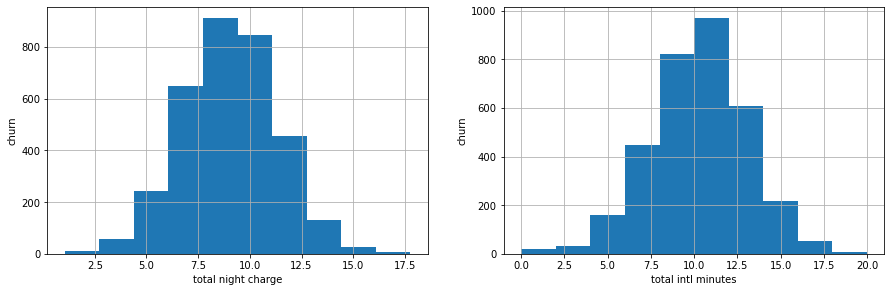

In [59]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df["total night charge"].hist(bins=10)
fig.set_xlabel('total night charge')
fig.set_ylabel('churn')

plt.subplot(2, 2, 2)
fig = df["total intl minutes"].hist(bins=10)
fig.set_xlabel('total intl minutes')
fig.set_ylabel('churn')

Text(0, 0.5, 'churn')

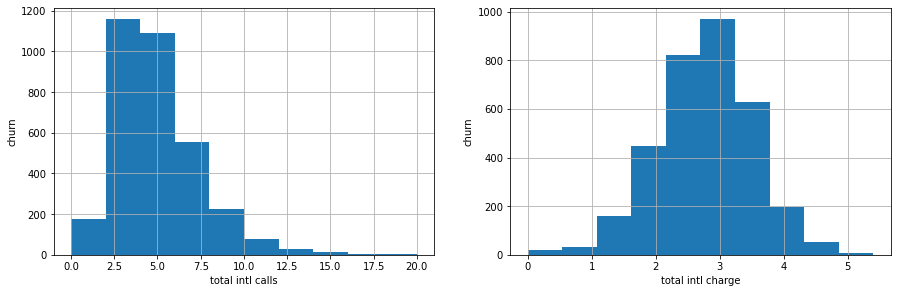

In [60]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df["total intl calls"].hist(bins=10)
fig.set_xlabel('total intl calls')
fig.set_ylabel('churn')

plt.subplot(2, 2, 2)
fig = df["total intl charge"].hist(bins=10)
fig.set_xlabel('total intl charge')
fig.set_ylabel('churn')

Text(0, 0.5, 'churn')

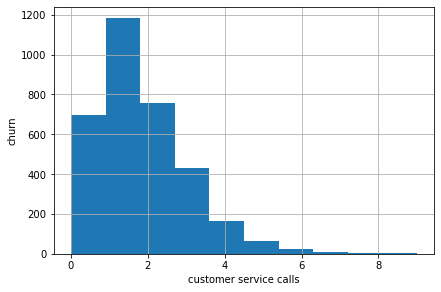

In [61]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df["customer service calls"].hist(bins=10)
fig.set_xlabel('customer service calls')
fig.set_ylabel('churn')

Use interquantile range to find outliers

In [62]:
# find outliers for account length variable

IQR = df["account length"].quantile(0.75) - df["account length"].quantile(0.25)
Lower_fence = df["account length"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["account length"].quantile(0.75) + (IQR * 1.5)
print('account length outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

account length outliers are values < -5.5 or > 206.5


In [63]:
# find outliers for number vmail messages variable

IQR = df["number vmail messages"].quantile(0.75) - df["number vmail messages"].quantile(0.25)
Lower_fence = df["number vmail messages"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["number vmail messages"].quantile(0.75) + (IQR * 1.5)
print('number vmail messages are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

number vmail messages are values < -30.0 or > 50.0


In [64]:
# find outliers for total day minutes variable

IQR = df["total day minutes"].quantile(0.75) - df["total day minutes"].quantile(0.25)
Lower_fence = df["total day minutes"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total day minutes"].quantile(0.75) + (IQR * 1.5)
print('total day minutes are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total day minutes are values < 34.64999999999996 or > 325.45000000000005


In [65]:
# find outliers for total day calls variable

IQR = df["total day calls"].quantile(0.75) - df["total day calls"].quantile(0.25)
Lower_fence = df["total day calls"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total day calls"].quantile(0.75) + (IQR * 1.5)
print('total day calls are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total day calls are values < 46.5 or > 154.5


In [66]:
# find outliers for total day charge variable

IQR = df["total day charge"].quantile(0.75) - df["total day charge"].quantile(0.25)
Lower_fence = df["total day charge"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total day charge"].quantile(0.75) + (IQR * 1.5)
print('total day charge are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total day charge are values < 5.890000000000001 or > 55.33


In [67]:
# find outliers for total eve minutes variable

IQR = df["total eve minutes"].quantile(0.75) - df["total eve minutes"].quantile(0.25)
Lower_fence = df["total eve minutes"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total eve minutes"].quantile(0.75) + (IQR * 1.5)
print('total eve minutes are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total eve minutes are values < 63.54999999999997 or > 338.35


In [68]:
# find outliers for total eve calls variable

IQR = df["total eve calls"].quantile(0.75) - df["total eve calls"].quantile(0.25)
Lower_fence = df["total eve calls"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total eve calls"].quantile(0.75) + (IQR * 1.5)
print('total eve calls are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total eve calls are values < 46.5 or > 154.5


In [69]:
# find outliers for total eve charge variable

IQR = df["total eve charge"].quantile(0.75) - df["total eve charge"].quantile(0.25)
Lower_fence = df["total eve charge"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total eve charge"].quantile(0.75) + (IQR * 1.5)
print('total eve charge are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total eve charge are values < 5.4 or > 28.759999999999998


In [70]:
# find outliers for total night minutes variable

IQR = df["total night minutes"].quantile(0.75) - df["total night minutes"].quantile(0.25)
Lower_fence = df["total night minutes"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total night minutes"].quantile(0.75) + (IQR * 1.5)
print('total night minutes are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total night minutes are values < 64.54999999999998 or > 337.75


In [71]:
# find outliers for total night calls variable

IQR = df["total night calls"].quantile(0.75) - df["total night calls"].quantile(0.25)
Lower_fence = df["total night calls"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total night calls"].quantile(0.75) + (IQR * 1.5)
print('total night calls are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total night calls are values < 48.0 or > 152.0


In [72]:
# find outliers for total night charge variable

IQR = df["total night charge"].quantile(0.75) - df["total night charge"].quantile(0.25)
Lower_fence = df["total night charge"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total night charge"].quantile(0.75) + (IQR * 1.5)
print('total night charge are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total night charge are values < 2.914999999999999 or > 15.195


In [73]:
# find outliers for total intl minutes variable

IQR = df["total intl minutes"].quantile(0.75) - df["total intl minutes"].quantile(0.25)
Lower_fence = df["total intl minutes"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total intl minutes"].quantile(0.75) + (IQR * 1.5)
print('total intl minutes are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total intl minutes are values < 3.1000000000000005 or > 17.5


In [74]:
# find outliers for total intl calls variable

IQR = df["total intl calls"].quantile(0.75) - df["total intl calls"].quantile(0.25)
Lower_fence = df["total intl calls"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total intl calls"].quantile(0.75) + (IQR * 1.5)
print('total intl calls are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total intl calls are values < -1.5 or > 10.5


In [75]:
# find outliers for total intl charge variable

IQR = df["total intl charge"].quantile(0.75) - df["total intl charge"].quantile(0.25)
Lower_fence = df["total intl charge"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["total intl charge"].quantile(0.75) + (IQR * 1.5)
print('total intl charge are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

total intl charge are values < 0.8449999999999995 or > 4.7250000000000005


In [76]:
# find outliers for customer service calls variable

IQR = df["customer service calls"].quantile(0.75) - df["customer service calls"].quantile(0.25)
Lower_fence = df["customer service calls"].quantile(0.25) - (IQR * 1.5)
Upper_fence = df["customer service calls"].quantile(0.75) + (IQR * 1.5)
print('customer service calls are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

customer service calls are values < -0.5 or > 3.5


### Exploratory data analysis summary
phone mumber is a categorical variable with high cardinality - 3333. Each instance has a separate phone number.
Therefore, a decision is made to drop the phone number variable at the end of EDA and create a new df i.e df_2

In [77]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [78]:
df.drop('phone number', axis = 1, inplace = True)

In [79]:
# changes made to the df and now has no phone number column
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Explore the Target outcome: Churn

In [80]:
# confirm churn column has boolean variable type
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [81]:
# Convert the boolean variable in churn column to binary  'Yes'/'No'
df['churn'] = df['churn'].apply(lambda x: 'Yes' if x else 'No')

# Check the first few rows to ensure the change has been made
df.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,No
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,No
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,No
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,No
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,No


churn column converted to a categorical variable
confirm churn is a categorical variable

In [82]:
# find categorical variables after: phone number dropped from dataframe and churn changed from boolean to binary datatype

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)


There are 4 categorical variables

The categorical variables are : ['state', 'international plan', 'voice mail plan', 'churn']


In [83]:
# view the categorical variables

df[categorical].head()

,state,international plan,voice mail plan,churn
0,KS,no,yes,No
1,OH,no,yes,No
2,NJ,no,no,No
3,OH,yes,no,No
4,OK,yes,no,No


In [84]:
# view frequency of target categorical variable - churn

print(df['churn'].value_counts())

No     2850
Yes     483
Name: churn, dtype: int64


In [85]:
# view frequency distribution of target categorical variables: churn

print(df['churn'].value_counts()/np.float64(len(df)))

No     0.855086
Yes    0.144914
Name: churn, dtype: float64


In [86]:
# print number of labels in churn variable
print('churn contains', len(df["churn"].unique()), 'labels')

churn contains 2 labels


In [87]:
# check labels in churn variable
df.churn.unique()

array(['No', 'Yes'], dtype=object)

In [88]:
# let's do One Hot Encoding of churn variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

#pd.get_dummies(df['churn'], drop_first=True, dummy_na=True,dtype='int').head()

In [89]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

#pd.get_dummies(df['churn'], drop_first=True, dummy_na=True).sum(axis=0)

## Declare feature variables and target variables

In [90]:
# drop churn variable from the feature variables 
# create a series with the target variable churn
X = df.drop('churn', axis=1)  

y = df['churn']

## Split data into training and test set

In [91]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [92]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2666, 19), (667, 19))

Explore the split data for missing variables

In [93]:
X_train.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1460,MT,80,415,no,no,0,198.1,160,33.68,156.7,87,13.32,182.1,76,8.19,9.3,3,2.51,3
2000,PA,28,415,no,no,0,168.2,87,28.59,161.7,92,13.74,192.4,112,8.66,10.1,3,2.73,3
666,OR,120,415,no,no,0,252.0,120,42.84,150.2,106,12.77,151.8,96,6.83,9.6,1,2.59,2
2962,SD,105,415,no,no,0,251.6,88,42.77,175.1,103,14.88,184.4,112,8.30,5.4,5,1.46,1
2773,NJ,134,510,no,yes,34,247.2,105,42.02,225.5,133,19.17,186.3,76,8.38,6.1,5,1.65,2


In [94]:
X_train.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')

## Feature Engineering

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. 
I will carry out feature engineering on different types of variables.

First, display the categorical and numerical variables again separately

In [95]:
# check data types in X_train

X_train.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object

In [96]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['state', 'international plan', 'voice mail plan']

In [97]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

### Engineering missing values in numerical variables

In [98]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

There are no missing values in the numerical variables in X_train dataset

In [99]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

There are no missing values in the numerical variables in X_test dataset

### Engineering missing values in categorical variables

In [100]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

state                 0
international plan    0
voice mail plan       0
dtype: int64

There are no missing values in the categorical variables in X_train dataset

In [101]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

state                 0
international plan    0
voice mail plan       0
dtype: int64

There are no missing values in the categorical variables in X_test dataset

### Engineering outliers in numerical variables


The numerical variables have outliers: 'account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls',  
'total eve charge', 'total night minutes', 'total night calls','total night charge','total intl minutes', 'total intl calls','total intl charge', 'customer service calls',

### Engineering outliers - upper thresholds 

In [102]:
upper_thresholds = {
    'account length': 206.5,
    'number vmail messages': 50,
    'total day minutes': 325.45,
    'total day calls': 154.5,
    'total day charge': 55.33,
    'total eve minutes': 338.35,
    'total eve calls': 154.5,
    'total eve charge': 28.76,
    'total night minutes': 337.75,
    'total night calls': 152,
    'total night charge': 15.2,
    'total intl minutes': 17.5,
    'total intl calls': 10.5,
    'total intl charge': 4.73,
    'customer service calls': 3.5,
}

for df1 in [X_train, X_test]:
    for column, top in upper_thresholds.items():
        df1[column] = df1[column].clip(upper=top)

In [103]:
X_train['account length'].max(), X_test['account length'].max()

(206.5, 206.5)

In [104]:
X_train['number vmail messages'].max(), X_test['number vmail messages'].max()

(50, 50)

In [105]:
X_train['total day minutes'].max(), X_test['total day minutes'].max()

(325.45, 325.45)

In [106]:
X_train['total day calls'].max(), X_test['total day calls'].max()

(154.5, 150)

In [107]:
X_train['total day charge'].max(), X_test['total day charge'].max()


(55.33, 55.33)

In [108]:
X_train['total eve minutes'].max(), X_test['total eve minutes'].max()

(338.35, 338.35)

In [109]:
X_train['total eve calls'].max(), X_test['total eve calls'].max()

(154.5, 152)

In [110]:
X_train['total eve charge'].max(), X_test['total eve charge'].max()

(28.76, 28.76)

In [111]:
X_train['total night minutes'].max(), X_test['total night minutes'].max()

(337.75, 337.75)

In [112]:
X_train['total night calls'].max(), X_test['total night calls'].max()

(152, 152)

In [113]:
X_train['total night charge'].max(), X_test['total night charge'].max()

(15.2, 15.2)

In [114]:
X_train['total intl minutes'].max(), X_test['total intl minutes'].max()

(17.5, 17.5)

In [115]:
X_train['total intl calls'].max(), X_test['total intl calls'].max()

(10.5, 10.5)

In [116]:
X_train['total intl charge'].max(), X_test['total intl charge'].max()

(4.73, 4.73)

In [117]:
X_train['customer service calls'].max(), X_test['customer service calls'].max()

(3.5, 3.5)

### Engineering outliers - lower thresholds 

In [118]:
lower_thresholds = {
    'account length': 0,
    'number vmail messages': 0,
    'total day minutes': 34.65,
    'total day calls': 46.5,
    'total day charge': 5.89,
    'total eve minutes': 63.55,
    'total eve calls': 46.5,
    'total eve charge': 5.4,
    'total night minutes': 64.55,
    'total night calls': 48,
    'total night charge': 2.91,
    'total intl minutes': 3.1,
    'total intl calls': 0,
    'total intl charge': 0.84,
    'customer service calls': 0,
}

for df1 in [X_train, X_test]:
    for column, bottom in lower_thresholds.items():
        df1[column] = df1[column].clip(lower=bottom)

In [119]:
X_train['account length'].min(), X_test['account length'].min()

(1.0, 1.0)

In [120]:
X_train['number vmail messages'].min(), X_test['number vmail messages'].min()

(0, 0)

In [121]:
X_train['total day minutes'].min(), X_test['total day minutes'].min()


(34.65, 34.65)

In [122]:
X_train['total day calls'].min(), X_test['total day calls'].min()

(46.5, 46.5)

In [123]:
X_train['total day charge'].min(), X_test['total day charge'].min()

(5.89, 5.89)

In [124]:
X_train['total eve minutes'].min(), X_test['total eve minutes'].min()

(63.55, 63.55)

In [125]:
X_train['total eve calls'].min(), X_test['total eve calls'].min()

(46.5, 46.5)

In [126]:
X_train['total eve charge'].min(), X_test['total eve charge'].min()

(5.4, 5.4)

In [127]:
X_train['total night minutes'].min(), X_test['total night minutes'].min()

(64.55, 64.55)

In [128]:
X_train['total night calls'].min(), X_test['total night calls'].min()

(48, 50)

In [129]:
X_train['total night charge'].min(), X_test['total night charge'].min()

(2.91, 2.91)

In [130]:
X_train['total intl minutes'].min(), X_test['total intl minutes'].min()

(3.1, 3.1)

In [131]:
X_train['total intl calls'].min(), X_test['total intl calls'].min()

(0.0, 0.0)

In [132]:
X_train['total intl charge'].min(), X_test['total intl charge'].min()

(0.84, 0.84)

In [133]:
X_train['customer service calls'].min(), X_test['customer service calls'].min()

(0.0, 0.0)

## Encode categorical variables

In [134]:
categorical 

['state', 'international plan', 'voice mail plan']

In [135]:
X_train[categorical].head(5)

,state,international plan,voice mail plan
1460,MT,no,no
2000,PA,no,no
666,OR,no,no
2962,SD,no,no
2773,NJ,no,yes


### Encode binary categorical variables: international plan & voice mail plan

In [136]:
# installed category encoders 
# encode international plan variable

import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=['international plan'])

X_train = binary_encoder.fit_transform(X_train)

X_test = binary_encoder.transform(X_test)

In [137]:
X_train.head(5)

,state,account length,area code,international plan_0,international plan_1,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1460,MT,80.0,415,0,1,no,0,198.1,154.5,33.68,156.7,87.0,13.32,182.1,76,8.19,9.3,3.0,2.51,3.0
2000,PA,28.0,415,0,1,no,0,168.2,87.0,28.59,161.7,92.0,13.74,192.4,112,8.66,10.1,3.0,2.73,3.0
666,OR,120.0,415,0,1,no,0,252.0,120.0,42.84,150.2,106.0,12.77,151.8,96,6.83,9.6,1.0,2.59,2.0
2962,SD,105.0,415,0,1,no,0,251.6,88.0,42.77,175.1,103.0,14.88,184.4,112,8.30,5.4,5.0,1.46,1.0
2773,NJ,134.0,510,0,1,yes,34,247.2,105.0,42.02,225.5,133.0,19.17,186.3,76,8.38,6.1,5.0,1.65,2.0


In [138]:
# encode voice mail plan variable

import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=['voice mail plan'])

X_train = binary_encoder.fit_transform(X_train)

X_test = binary_encoder.transform(X_test)

In [139]:
X_train.head(5)

,state,account length,area code,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1,number vmail messages,total day minutes,total day calls,...,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1460,MT,80.0,415,0,1,0,1,0,198.1,154.5,...,156.7,87.0,13.32,182.1,76,8.19,9.3,3.0,2.51,3.0
2000,PA,28.0,415,0,1,0,1,0,168.2,87.0,...,161.7,92.0,13.74,192.4,112,8.66,10.1,3.0,2.73,3.0
666,OR,120.0,415,0,1,0,1,0,252.0,120.0,...,150.2,106.0,12.77,151.8,96,6.83,9.6,1.0,2.59,2.0
2962,SD,105.0,415,0,1,0,1,0,251.6,88.0,...,175.1,103.0,14.88,184.4,112,8.30,5.4,5.0,1.46,1.0
2773,NJ,134.0,510,0,1,1,0,34,247.2,105.0,...,225.5,133.0,19.17,186.3,76,8.38,6.1,5.0,1.65,2.0


### Encode categorical variable state: use one hot encoder

In [140]:
# Encode state categorical variable using ohe

from sklearn.preprocessing import OneHotEncoder

ohe = ce.OneHotEncoder("state", handle_missing="value",handle_unknown="ignore")

X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [141]:
X_train.head()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1460,1,0,0,0,0,0,0,0,0,0,...,156.7,87.0,13.32,182.1,76,8.19,9.3,3.0,2.51,3.0
2000,0,1,0,0,0,0,0,0,0,0,...,161.7,92.0,13.74,192.4,112,8.66,10.1,3.0,2.73,3.0
666,0,0,1,0,0,0,0,0,0,0,...,150.2,106.0,12.77,151.8,96,6.83,9.6,1.0,2.59,2.0
2962,0,0,0,1,0,0,0,0,0,0,...,175.1,103.0,14.88,184.4,112,8.30,5.4,5.0,1.46,1.0
2773,0,0,0,0,1,0,0,0,0,0,...,225.5,133.0,19.17,186.3,76,8.38,6.1,5.0,1.65,2.0


In [142]:
X_test.head(5)

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
405,0,0,0,0,0,0,0,0,0,0,...,160.9,115.0,13.68,198.6,73,8.94,9.3,5.0,2.51,0.0
118,0,0,0,0,0,0,0,0,0,0,...,157.5,82.0,13.39,177.6,118,7.99,10.0,3.0,2.70,2.0
710,0,0,0,0,0,0,0,0,0,0,...,216.7,108.0,18.42,259.9,119,11.70,12.5,4.0,3.38,3.0
499,0,0,0,0,0,0,1,0,0,0,...,244.4,109.0,20.77,75.8,95,3.41,7.5,2.0,2.03,1.0
2594,0,0,0,0,0,0,0,0,0,0,...,203.4,106.0,17.29,217.5,107,9.79,11.8,8.0,3.19,1.0


Training and testing datsets ready for model building. 

# **Feature Scaling**

Process of mapping all the feature variables onto the same scale

In [143]:
X_train.describe()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,...,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,0.022506,0.013878,0.023256,0.018005,0.019130,0.020255,0.030758,0.016879,0.018755,0.020630,...,201.614797,100.111215,17.137457,201.165060,100.052888,9.052532,10.258177,4.426482,2.770251,1.467367
std,0.148349,0.117009,0.150743,0.132992,0.137007,0.140898,0.172693,0.128843,0.135683,0.142169,...,50.688876,19.828389,4.308606,50.118223,19.681169,2.255313,2.739771,2.263388,0.739710,1.107312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.550000,46.500000,5.400000,64.550000,48.000000,2.910000,3.100000,0.000000,0.840000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,166.925000,87.000000,14.192500,167.100000,86.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,202.450000,100.000000,17.205000,201.200000,100.000000,9.055000,10.300000,4.000000,2.780000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,236.200000,114.000000,20.080000,235.675000,114.000000,10.607500,12.100000,6.000000,3.270000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,338.350000,154.500000,28.760000,337.750000,152.000000,15.200000,17.500000,10.500000,4.730000,3.500000


In [144]:
from sklearn.preprocessing import MinMaxScaler

# initialize the scaler
scaler = MinMaxScaler()

# fit the scaler on the training data
scaler.fit(X_train)

MinMaxScaler()

In [145]:
# Transform the training data and convert it back to a Dataframe
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
    )

In [146]:
# Transform the testing data 
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
    )

In [147]:
X_train_scaled.describe()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,...,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,0.022506,0.013878,0.023256,0.018005,0.019130,0.020255,0.030758,0.016879,0.018755,0.020630,...,0.502419,0.496400,0.502460,0.500055,0.500509,0.499799,0.497096,0.421570,0.496209,0.419248
std,0.148349,0.117009,0.150743,0.132992,0.137007,0.140898,0.172693,0.128843,0.135683,0.142169,...,0.184457,0.183596,0.184444,0.183449,0.189242,0.183508,0.190262,0.215561,0.190157,0.316375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.376183,0.375000,0.376391,0.375366,0.365385,0.375102,0.375000,0.285714,0.375321,0.285714
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.505459,0.495370,0.505351,0.500183,0.500000,0.500000,0.500000,0.380952,0.498715,0.285714
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.628275,0.625000,0.628425,0.626373,0.634615,0.626322,0.625000,0.571429,0.624679,0.571429
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Model training** 

### Train a logistic regression model on the training set


In [148]:
# import the necessary library
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=0, solver='liblinear')

# **Predict results** 


In [149]:
# Make predictions on the test dataset based on the training dataset
y_pred_test = logreg.predict(X_test_scaled)

# output the predictions
print("Predicted labels:", y_pred_test)


Predicted labels: ['No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'N

### predict_proba method

**predict_proba** method gives the probabilities for the target variable(1 and 1) as an array form

`1 is for probability of the customer leaving the telecom company` and `0 of the customer not leaving the telecom company.`

In [150]:
# probability of getting output as 0 - Customer not leaving the telecom company

logreg.predict_proba(X_test_scaled)[:,0]

array([0.66081776, 0.97965738, 0.78766302, 0.92341676, 0.23181024,
       0.1409611 , 0.69555128, 0.92807273, 0.73126285, 0.53839649,
       0.96291621, 0.92997636, 0.81923187, 0.99244181, 0.71504079,
       0.76356379, 0.84012598, 0.89627703, 0.92936784, 0.95281071,
       0.93613513, 0.96426677, 0.94141016, 0.97518937, 0.92405798,
       0.92087038, 0.89466796, 0.93755898, 0.73252989, 0.82257292,
       0.87834863, 0.97206797, 0.6579107 , 0.98468304, 0.96549802,
       0.92808887, 0.25009236, 0.95508755, 0.96673639, 0.64511871,
       0.93270232, 0.84240834, 0.5836549 , 0.70661939, 0.97492138,
       0.9857126 , 0.93630539, 0.95812823, 0.91922354, 0.94765235,
       0.98025827, 0.88173622, 0.79654404, 0.82312875, 0.9861006 ,
       0.9641238 , 0.94783197, 0.96891961, 0.85704342, 0.36738573,
       0.91746782, 0.95429804, 0.9914352 , 0.93263865, 0.83879874,
       0.7340757 , 0.8794413 , 0.85724141, 0.96642839, 0.9457337 ,
       0.9951566 , 0.98588448, 0.95559449, 0.58355798, 0.71105

In [151]:
# probability of getting output as 1 - probability of the customer leaving the telecom company

logreg.predict_proba(X_test_scaled)[:,1]

array([0.33918224, 0.02034262, 0.21233698, 0.07658324, 0.76818976,
       0.8590389 , 0.30444872, 0.07192727, 0.26873715, 0.46160351,
       0.03708379, 0.07002364, 0.18076813, 0.00755819, 0.28495921,
       0.23643621, 0.15987402, 0.10372297, 0.07063216, 0.04718929,
       0.06386487, 0.03573323, 0.05858984, 0.02481063, 0.07594202,
       0.07912962, 0.10533204, 0.06244102, 0.26747011, 0.17742708,
       0.12165137, 0.02793203, 0.3420893 , 0.01531696, 0.03450198,
       0.07191113, 0.74990764, 0.04491245, 0.03326361, 0.35488129,
       0.06729768, 0.15759166, 0.4163451 , 0.29338061, 0.02507862,
       0.0142874 , 0.06369461, 0.04187177, 0.08077646, 0.05234765,
       0.01974173, 0.11826378, 0.20345596, 0.17687125, 0.0138994 ,
       0.0358762 , 0.05216803, 0.03108039, 0.14295658, 0.63261427,
       0.08253218, 0.04570196, 0.0085648 , 0.06736135, 0.16120126,
       0.2659243 , 0.1205587 , 0.14275859, 0.03357161, 0.0542663 ,
       0.0048434 , 0.01411552, 0.04440551, 0.41644202, 0.28894

# **Evaluation of the models performance**

The performance of the model is performed using several metrics

### Acuracy score

Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set

In [152]:
# impport the evaluation libraries
from sklearn.metrics import accuracy_score

print ('Model accuracy score:{0:0.4f}'.format (accuracy_score(y_test, y_pred_test)))

Model accuracy score:0.8636


### Compare the train-set and test-set accuracy

Compare the train-set and test-set accuracy to check for overfitting.

In [153]:
y_pred_train = logreg.predict(X_train_scaled)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [154]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8725


### Check for overfitting and underfitting

In [155]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train_scaled, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_scaled, y_test)))

Training set score: 0.8725
Test set score: 0.8636


#### The training set accuracy score is **0.8725** while the test-set accuracy to be **0.8636**. 
These two values are quite comparable. So, there is no evidence of overfitting. 


### Evaluation of model with C=100
In Logistic Regression, we use default value of C = 1. It provides good performance with more than 85% accuracy on both the training and the test set. The model performance on both the training and test set are very comparable. 

Increase C and fit a more flexible model to compare the results with a C = 1

In [156]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)

# fit the model
logreg100.fit(X_train_scaled, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [157]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train_scaled, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test_scaled, y_test)))

Training set score: 0.8728
Test set score: 0.8516


#### C=100 results in higher training set accuracy of **0.8728** and also a lower test set accuracy of **0.8516** 
Therefore we can conclude that a more complex model performs worse due to overfitting / overtraining of the model.

### Evaluation of model with C=0.01
Investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01

In [158]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)

# fit the model
logreg001.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [159]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train_scaled, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test_scaled, y_test)))

Training set score: 0.8518
Test set score: 0.8681


#### C=0.01 results in higher test set accuracy of **0.8681** and  a lower training set accuracy of **0.8518** 
Therefore we can conclude that a more regularized model by setting C=0.01 performs worse than the model with C = 1 due to underfitting of the model.

### Compare model accuracy with null accuracy

The model accuracy is **0.8683**. But, we cannot say that our model is very good based on the above accuracy. 
We must compare it with the **null accuracy**. 
Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [160]:
# check class distribution in test set

y_test.value_counts()

No     579
Yes     88
Name: churn, dtype: int64

The occurences of most frequent class is 579. 

- calculate null accuracy by dividing 579 by total number of occurences.

In [161]:
# check null accuracy score
null_accuracy = (579/(579+88))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8681


The model accuracy score is **0.8636** but null accuracy score is **0.8681**. 

Conclucion: Null accuracy > Model accuracy
- model is performing worse than the baseline model and is not making useful predictions beyond what could be achieved by always predicting the most common outcome
Action:
- improve feature engineering, try a different model and check for overfitting
- use other metric for evaluation of the model i.e precision, recall, F1-score, AUC-ROC


# **Confusion matrix**


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and 
the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [162]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[558  21]
 [ 70  18]]

True Positives(TP) =  558

True Negatives(TN) =  18

False Positives(FP) =  21

False Negatives(FN) =  70


#### The confusion matrix shows:
- Correct predictions:  `558 + 18 = 576 correct predictions`
- Incorrect predictions: `21 + 70 = 91 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 558


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 18


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 21 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 70 `(Type II error)`

<AxesSubplot:>

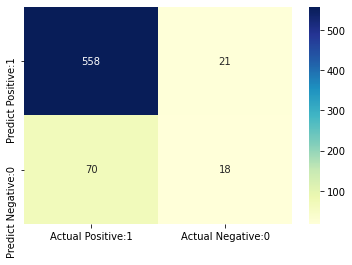

In [163]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **Classification metrices** 

## Classification Report

**Classification report** 
- Another way to evaluate the classification model performance. 
- It displays the  **precision**, **recall**, **f1** and **support** scores for the model. 

#### Print a classification report as follows:-

In [164]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.89      0.96      0.92       579
         Yes       0.46      0.20      0.28        88

    accuracy                           0.86       667
   macro avg       0.68      0.58      0.60       667
weighted avg       0.83      0.86      0.84       667



## Classification accuracy

In [165]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [166]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8636


## Classification error

In [167]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1364


## Precision

**Precision** 
- Defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. 
- Given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 
- **Precision** identifies the proportion of correctly predicted positive outcome i.e concerned with the positive class.

Mathematically, precision defined as the ratio of `TP to (TP + FP).`

In [168]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9637


## Recall

- Defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
- Given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). 
- **Recall** also called **Sensitivity**.
- **Recall** identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of `TP to (TP + FN).`

In [169]:
# calculate and print recall
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8885


## True Positive Rate

**True Positive Rate** is synonymous with **Recall**.

In [170]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8885


## False Positive Rate

In [171]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.5385


## Specificity

In [172]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.4615


## F1-score

**F1-score** 
- The weighted harmonic mean of precision and recall. 
- The best possible **f1-score** would be 1.0 and the worst would be 0.0.  
- **f1-score** is the harmonic mean of precision and recall. 
- **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. 
- The weighted average of `f1-score` should be used to compare classifier models, not global accuracy.